In [1]:
import nibabel as nib
import numpy as np
import glob
import pandas as pd
import subprocess as sp
import matplotlib.pyplot as plt

# Figure 6

In [4]:
template = nib.load('/Users/neurogazer/Pipeline/Publication_Work/PAFA/Schaefer2018_400Parcels_17Networks_order.dlabel.nii')
print(template)
print(template.header)
print(template.shape)

template_labels = template.header.get_axis(0).label
len(template_labels[0])

voxel_all_index = template.get_fdata()
print(len(voxel_all_index[0]))
voxel_index = np.array([list(voxel_all_index[0])])
print(len(voxel_index[0]))
voxel_index, template_labels[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(1, 64984)
64984
64984


(array([[156.,  42.,  58., ..., 337., 337., 337.]]),
 {0: ('???', (1.0, 1.0, 1.0, 0.0)),
  1: ('17Networks_LH_VisCent_ExStr_1', (0.470588, 0.0705882, 0.513726, 1.0)),
  2: ('17Networks_LH_VisCent_ExStr_2', (0.470588, 0.0705882, 0.517647, 1.0)),
  3: ('17Networks_LH_VisCent_ExStr_3', (0.470588, 0.0705882, 0.521569, 1.0)),
  4: ('17Networks_LH_VisCent_ExStr_4', (0.470588, 0.0705882, 0.52549, 1.0)),
  5: ('17Networks_LH_VisCent_ExStr_5', (0.470588, 0.0705882, 0.533333, 1.0)),
  6: ('17Networks_LH_VisCent_ExStr_6', (0.470588, 0.0705882, 0.537255, 1.0)),
  7: ('17Networks_LH_VisCent_Striate_1', (0.470588, 0.0705882, 0.541176, 1.0)),
  8: ('17Networks_LH_VisCent_ExStr_7', (0.470588, 0.0705882, 0.545098, 1.0)),
  9: ('17Networks_LH_VisCent_ExStr_8', (0.470588, 0.0705882, 0.54902, 1.0)),
  10: ('17Networks_LH_VisCent_ExStr_9', (0.470588, 0.0705882, 0.552941, 1.0)),
  11: ('17Networks_LH_VisCent_ExStr_10', (0.470588, 0.0705882, 0.556863, 1.0)),
  12: ('17Networks_LH_VisCent_ExStr_11', (0.470588

In [3]:
roi_list = []
for i in range(len(template_labels[0])):
    roi_list.append(template_labels[0][i][0])
roi_list = np.array(roi_list)
print(len(roi_list))
roi_list

401


array(['???', '17Networks_LH_VisCent_ExStr_1',
       '17Networks_LH_VisCent_ExStr_2', '17Networks_LH_VisCent_ExStr_3',
       '17Networks_LH_VisCent_ExStr_4', '17Networks_LH_VisCent_ExStr_5',
       '17Networks_LH_VisCent_ExStr_6', '17Networks_LH_VisCent_Striate_1',
       '17Networks_LH_VisCent_ExStr_7', '17Networks_LH_VisCent_ExStr_8',
       '17Networks_LH_VisCent_ExStr_9', '17Networks_LH_VisCent_ExStr_10',
       '17Networks_LH_VisCent_ExStr_11',
       '17Networks_LH_VisPeri_ExStrInf_1',
       '17Networks_LH_VisPeri_ExStrInf_2',
       '17Networks_LH_VisPeri_ExStrInf_3',
       '17Networks_LH_VisPeri_ExStrInf_4',
       '17Networks_LH_VisPeri_ExStrInf_5',
       '17Networks_LH_VisPeri_StriCal_1',
       '17Networks_LH_VisPeri_StriCal_2',
       '17Networks_LH_VisPeri_ExStrSup_1',
       '17Networks_LH_VisPeri_ExStrSup_2',
       '17Networks_LH_VisPeri_ExStrSup_3',
       '17Networks_LH_VisPeri_ExStrSup_4',
       '17Networks_LH_VisPeri_ExStrSup_5', '17Networks_LH_SomMotA_1',
   

In [9]:
mfmc_orig_path = '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_MF_n441_schaefer400.dscalar.nii'
mfmc_orig_data = np.array(nib.load(mfmc_orig_path).get_fdata())
print(mfmc_orig_data.shape)

tfmc_orig_path = '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_TF_n441_schaefer400.dscalar.nii'
tfmc_orig_data = np.array(nib.load(tfmc_orig_path).get_fdata())
print(tfmc_orig_data.shape)

(1, 64984)
(1, 64984)


In [10]:
corr_lists = []
for corr_data in [mfmc_orig_data, tfmc_orig_data]:
    voxel_corr_roi_list = []
    for i, entry in enumerate(voxel_index[0]):
        corr_val = corr_data[0][i]
        roi = template_labels[0][entry][0]
    #     print(i, roi, corr_val)
        voxel_corr_roi_list.append([roi, corr_val])

    corr_map = []
    for region in roi_list:
        mean_count = 0
        mean_sum = 0
        for entry in voxel_corr_roi_list:
            roi = entry[0]
            corr_val = entry[1]
            if region == roi:
                mean_count = mean_count + 1
                mean_sum = mean_sum + corr_val
        if region == '???':
            mean_val = 0
        else:
            mean_val = mean_sum / mean_count
#         print(region, mean_val)
        corr_map.append([region, mean_val])

    print(len(corr_map))
    corr_lists.append(corr_map)
print(len(corr_lists))

401
401
2


In [11]:
labels = [entry[0] for entry in corr_lists[0][1:]]
mfmc_orig = [entry[1] for entry in corr_lists[0][1:]]
tfmc_orig = [entry[1] for entry in corr_lists[1][1:]]

print(len(labels), len(mfmc_orig), len(tfmc_orig))
print(labels)

400 400 400
['17Networks_LH_VisCent_ExStr_1', '17Networks_LH_VisCent_ExStr_2', '17Networks_LH_VisCent_ExStr_3', '17Networks_LH_VisCent_ExStr_4', '17Networks_LH_VisCent_ExStr_5', '17Networks_LH_VisCent_ExStr_6', '17Networks_LH_VisCent_Striate_1', '17Networks_LH_VisCent_ExStr_7', '17Networks_LH_VisCent_ExStr_8', '17Networks_LH_VisCent_ExStr_9', '17Networks_LH_VisCent_ExStr_10', '17Networks_LH_VisCent_ExStr_11', '17Networks_LH_VisPeri_ExStrInf_1', '17Networks_LH_VisPeri_ExStrInf_2', '17Networks_LH_VisPeri_ExStrInf_3', '17Networks_LH_VisPeri_ExStrInf_4', '17Networks_LH_VisPeri_ExStrInf_5', '17Networks_LH_VisPeri_StriCal_1', '17Networks_LH_VisPeri_StriCal_2', '17Networks_LH_VisPeri_ExStrSup_1', '17Networks_LH_VisPeri_ExStrSup_2', '17Networks_LH_VisPeri_ExStrSup_3', '17Networks_LH_VisPeri_ExStrSup_4', '17Networks_LH_VisPeri_ExStrSup_5', '17Networks_LH_SomMotA_1', '17Networks_LH_SomMotA_2', '17Networks_LH_SomMotA_3', '17Networks_LH_SomMotA_4', '17Networks_LH_SomMotA_5', '17Networks_LH_SomMotA

In [12]:
corr_val = np.corrcoef(mfmc_orig, tfmc_orig)[0][1]
corr_val

0.6849962510099952

In [13]:
labels

['17Networks_LH_VisCent_ExStr_1',
 '17Networks_LH_VisCent_ExStr_2',
 '17Networks_LH_VisCent_ExStr_3',
 '17Networks_LH_VisCent_ExStr_4',
 '17Networks_LH_VisCent_ExStr_5',
 '17Networks_LH_VisCent_ExStr_6',
 '17Networks_LH_VisCent_Striate_1',
 '17Networks_LH_VisCent_ExStr_7',
 '17Networks_LH_VisCent_ExStr_8',
 '17Networks_LH_VisCent_ExStr_9',
 '17Networks_LH_VisCent_ExStr_10',
 '17Networks_LH_VisCent_ExStr_11',
 '17Networks_LH_VisPeri_ExStrInf_1',
 '17Networks_LH_VisPeri_ExStrInf_2',
 '17Networks_LH_VisPeri_ExStrInf_3',
 '17Networks_LH_VisPeri_ExStrInf_4',
 '17Networks_LH_VisPeri_ExStrInf_5',
 '17Networks_LH_VisPeri_StriCal_1',
 '17Networks_LH_VisPeri_StriCal_2',
 '17Networks_LH_VisPeri_ExStrSup_1',
 '17Networks_LH_VisPeri_ExStrSup_2',
 '17Networks_LH_VisPeri_ExStrSup_3',
 '17Networks_LH_VisPeri_ExStrSup_4',
 '17Networks_LH_VisPeri_ExStrSup_5',
 '17Networks_LH_SomMotA_1',
 '17Networks_LH_SomMotA_2',
 '17Networks_LH_SomMotA_3',
 '17Networks_LH_SomMotA_4',
 '17Networks_LH_SomMotA_5',
 '17Ne

In [14]:
colors = []
plot_labels = []
for corr_label in labels:
    if corr_label.find('VisCent') > 0:
        color = (0.470588, 0.0705882, 0.513726)
        label = 'Vis-A'
    if corr_label.find('VisPeri') > 0:
        color = (1.0, 0.00392157, 0.00392157)
        label = 'Vis-B'
    if corr_label.find('SomMotA') > 0:
        color = (0.27451, 0.505882, 0.705882)
        label = 'SM-A'
    if corr_label.find('SomMotB') > 0:
        color = (0.168627, 0.8, 0.619608)
        label = 'SM-B'
    if corr_label.find('DorsAttnA') > 0:
        color = (0.290196, 0.607843, 0.239216)
        label = 'DA-A'
    if corr_label.find('DorsAttnB') > 0:
        color = (0.0, 0.462745, 0.0470588)
        label = 'DA-B'
    if corr_label.find('SalVentAttnA') > 0:
        color = (0.768627, 0.227451, 0.984314)
        label = 'SVA-A'
    if corr_label.find('SalVentAttnB') > 0:
        color = (1.0, 0.6, 0.839216)
        label = 'SVA-B'
    if corr_label.find('LimbicA') > 0:
        color = (0.862745, 0.972549, 0.635294)
        label = 'Lim-A'
    if corr_label.find('LimbicB') > 0:
        color = (0.478431, 0.529412, 0.192157)
        label = 'Lim-B'
    if corr_label.find('ContA') > 0:
        color = (0.901961, 0.580392, 0.137255)
        label = 'Cont-A'
    if corr_label.find('ContB') > 0:
        color = (0.529412, 0.196078, 0.294118)
        label = 'Cont-B'
    if corr_label.find('ContC') > 0:
        color = (0.466667, 0.54902, 0.694118)
        label = 'Cont-C'
    if corr_label.find('DefaultA') > 0:
        color = (1.0, 0.996078, 0.00392157)
        label = 'Def-A'
    if corr_label.find('DefaultB') > 0:
        color = (0.803922, 0.243137, 0.301961)
        label = 'Def-B'
    if corr_label.find('DefaultC') > 0:
        color = (0.0, 0.0, 0.513726)
        label = 'Def-C'
    if corr_label.find('TempPar') > 0:
        color = (0.0470588, 0.188235, 0.996078)
        label = 'TempPar'
    colors.append(color)
    plot_labels.append(label)

colors = list(np.array(colors))

In [15]:
len(colors), len(plot_labels)

(400, 400)

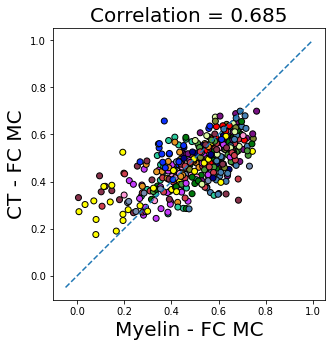

In [16]:
plt.figure(figsize=(20,5))

plt.subplot(111).set_aspect('equal', adjustable='box')
plt.scatter(mfmc_orig, tfmc_orig, color=colors, edgecolors='black')
# plt.xticks(size = 20)
plt.xlabel('Myelin - FC MC', size = 20)
plt.ylabel('CT - FC MC', size = 20)
title = 'Correlation = ' + str(round(corr_val, 3))
plt.title(title, size = 20)
plt.plot([-.05,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], [-.05,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], '--')

plt.savefig('/Users/neurogazer/Pipeline/Publication_Work/PAFA/Figures/fig6/MFMC_TFMC_Compare_Schaefer.pdf', bbox_inches='tight')
plt.show()

# Figure 8

In [17]:
networks_names = ['VisCent', 'VisPeri', 'SomMotA', 'SomMotB', 'DorsAttnA', 'DorsAttnB', 'SalVentAttnA', 'SalVentAttnB',
                  'LimbicA', 'LimbicB', 'ContA', 'ContB', 'ContC', 'DefaultA', 'DefaultB', 'DefaultC', 'TempPar']
plot_networks_names = networks_names

In [18]:
# Create weights for network averages 
def get_weights():
    roi_voxel_count_list = []
    for region in roi_list:
        roi_count = 0
        for entry in voxel_index[0]:
            roi = template_labels[0][entry][0]
            if region == roi:
                roi_count = roi_count + 1
        roi_voxel_count_list.append([region, roi_count])
    print(len(roi_voxel_count_list))
    
    net_voxel_count_list = []
    for net in networks_names:
        net_voxel_count = 0
        for i in range(len(roi_voxel_count_list)):
            if roi_voxel_count_list[i][0].find(net) > 0:
                    net_voxel_count = net_voxel_count + roi_voxel_count_list[i][1]
        net_voxel_count_list.append([net, net_voxel_count])
    print(len(net_voxel_count_list))
    
    roi_weight_list = []
    for i in range(len(roi_voxel_count_list)):
        roi_name = roi_voxel_count_list[i][0]
        if roi_name == '???':
                roi_weight_list.append([roi_name, 1])
        for j in range(len(net_voxel_count_list)):
            net_name = net_voxel_count_list[j][0]
            if roi_name.find(net_name) > 0:
                weight = roi_voxel_count_list[i][1] / net_voxel_count_list[j][1] 
                roi_weight_list.append([roi_name, weight])
    return roi_weight_list

In [19]:
roi_weights = get_weights()
print(len(roi_weights))

401
17
401


In [20]:
# Weighted network averages 
def Make_Network_Plots(file_list):
    output_list, error_df_list = [], []
    for entry in file_list:
        corr_data = np.arctanh(np.array(nib.load(entry).get_fdata())) #Meta-correlation values
#         corr_data = np.array(nib.load(entry).get_fdata())             #Mean Values
        print(corr_data.shape)
        
        voxel_corr_roi_list = []
        for i, entry in enumerate(voxel_index[0]):
            corr_val = corr_data[0][i]
            roi = template_labels[0][entry][0]
        #     print(i, roi, corr_val)
            voxel_corr_roi_list.append([roi, corr_val])
            
        corr_map = []
        for region in roi_list:
            mean_count = 0
            mean_sum = 0
            for entry in voxel_corr_roi_list:
                roi = entry[0]
                corr_val = entry[1]
                if region == roi:
                    mean_count = mean_count + 1
                    mean_sum = mean_sum + corr_val
            if region == '???':
                mean_val = 0
            else:
                mean_val = mean_sum / mean_count
        #     print(region, mean_val)
            corr_map.append([region, mean_val])
        print(len(corr_map))
        
        voxel_data = []
        for entry in voxel_index[0]:
            roi = template_labels[0][entry][0]
#             print(entry, roi)
            for entry in corr_map:
                if entry[0] == roi:
                    voxel_data.append(entry[1])
                    
        vc_list, vp_list, smA_list, smB_list, daA_list, daB_list, svaA_list, svaB_list =  [], [], [], [], [], [], [], []
        limA_list, limB_list, conA_list, conB_list, conC_list = [], [], [], [], [] 
        defA_list, defB_list, defC_list, tp_list = [], [], [], []
        for i in range(np.shape(corr_map)[0]):
            corr_val = corr_map[i][1]
            corr_label = roi_list[i]
            weight = roi_weights[i][1]
#             print(corr_label, corr_val)

            if corr_label.find('VisCent') > 0:
                vc_list.append([corr_val, weight])
            if corr_label.find('VisPeri') > 0:
                vp_list.append([corr_val, weight])
            if corr_label.find('SomMotA') > 0:
                smA_list.append([corr_val, weight])
            if corr_label.find('SomMotB') > 0:
                smB_list.append([corr_val, weight])
            if corr_label.find('DorsAttnA') > 0:
                daA_list.append([corr_val, weight])
            if corr_label.find('DorsAttnB') > 0:
                daB_list.append([corr_val, weight])
            if corr_label.find('SalVentAttnA') > 0:
                svaA_list.append([corr_val, weight])
            if corr_label.find('SalVentAttnB') > 0:
                svaB_list.append([corr_val, weight])
            if corr_label.find('LimbicA') > 0:
                limA_list.append([corr_val, weight])
            if corr_label.find('LimbicB') > 0:
                limB_list.append([corr_val, weight])
            if corr_label.find('ContA') > 0:
                conA_list.append([corr_val, weight])
            if corr_label.find('ContB') > 0:
                conB_list.append([corr_val, weight])
            if corr_label.find('ContC') > 0:
                conC_list.append([corr_val, weight])
            if corr_label.find('DefaultA') > 0:
                defA_list.append([corr_val, weight])
            if corr_label.find('DefaultB') > 0:
                defB_list.append([corr_val, weight])
            if corr_label.find('DefaultC') > 0:
                defC_list.append([corr_val, weight])
            if corr_label.find('TempPar') > 0:
                tp_list.append([corr_val, weight])
        print([len(entry) for entry in [vc_list, vp_list, smA_list, smB_list, daA_list, daB_list, svaA_list, svaB_list, limA_list, 
                  limB_list, conA_list, conB_list, conC_list, defA_list, defB_list, defC_list, tp_list]])
                
        mean_corr_list = []
        error_df = pd.DataFrame()
        for ii, network_list in enumerate([vc_list, vp_list, smA_list, smB_list, daA_list, daB_list, svaA_list, 
                                           svaB_list, limA_list, limB_list, conA_list, conB_list, conC_list, 
                                           defA_list, defB_list, defC_list, tp_list]):
            vals = [entry[0] for entry in network_list]
            weights = [entry[1] for entry in network_list]
#             print(vals)
#             print(weights)
            mean_corr = np.average(vals, weights=weights)
            mean_corr_list.append(mean_corr)
            error_df[plot_networks_names[ii]] = pd.Series(vals)
            error_df[plot_networks_names[ii]+'_weights'] = pd.Series(weights)
        print(len(mean_corr_list))
        
        mean_corr_list_sort, plot_networks_names_sort, networks_names_sort = (list(t) for t in zip(*sorted(
                                zip(mean_corr_list, plot_networks_names, networks_names), reverse=True)))
            
        output_list.append([plot_networks_names_sort, mean_corr_list_sort])
        error_df_list.append(error_df)
        
    return output_list, error_df_list

In [21]:
file_list = ['/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_MF_n441_schaefer400.dscalar.nii', 
             '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_TF_n441_schaefer400.dscalar.nii',
             '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_MT_n441_schaefer400.dscalar.nii']
plot_list, error_dfs = Make_Network_Plots(file_list)
print('\n ' + str(len(error_dfs)))
plot_list

(1, 64984)
401
[24, 23, 39, 31, 27, 25, 34, 17, 13, 11, 24, 25, 12, 34, 32, 13, 16]
17
(1, 64984)
401
[24, 23, 39, 31, 27, 25, 34, 17, 13, 11, 24, 25, 12, 34, 32, 13, 16]
17
(1, 64984)
401
[24, 23, 39, 31, 27, 25, 34, 17, 13, 11, 24, 25, 12, 34, 32, 13, 16]
17

 3


[[['SomMotA',
   'VisPeri',
   'VisCent',
   'LimbicB',
   'LimbicA',
   'DorsAttnA',
   'DorsAttnB',
   'DefaultC',
   'DefaultB',
   'SalVentAttnB',
   'ContC',
   'ContA',
   'TempPar',
   'ContB',
   'SalVentAttnA',
   'SomMotB',
   'DefaultA'],
  [0.7512458016354939,
   0.7311760154750301,
   0.729884862372409,
   0.7172141945873415,
   0.6587266200167398,
   0.6534859459839454,
   0.6333265152227477,
   0.6129651650138246,
   0.5499335680208886,
   0.5400870073977095,
   0.5281285966593335,
   0.47512372742355746,
   0.44531724171634524,
   0.44490511158807916,
   0.44489721482708755,
   0.4434745321416792,
   0.38122339304913194]],
 [['VisPeri',
   'VisCent',
   'LimbicA',
   'LimbicB',
   'TempPar',
   'SomMotA',
   'DefaultC',
   'DorsAttnA',
   'DorsAttnB',
   'ContA',
   'DefaultB',
   'SalVentAttnB',
   'SomMotB',
   'ContB',
   'ContC',
   'DefaultA',
   'SalVentAttnA'],
  [0.6535072132944219,
   0.6427104473560965,
   0.6376293841916839,
   0.6320915464885996,
   0.597346

In [22]:
# This block of code makes the order of the networks be the same in the 3 plots at voxel level.
# Note: we use ordering of voxel MFMC for all bar plots
mfmc_plot_order = plot_list[0][0]
mfmc_plot_values = plot_list[0][1]
tfmc_plot_order = plot_list[1][0]
tfmc_plot_values = plot_list[1][1]
mtmc_plot_order = plot_list[2][0]
mtmc_plot_values = plot_list[2][1]

new_tfmc_plot_order, new_tfmc_plot_values, new_mtmc_plot_order, new_mtmc_plot_values = [], [], [], []
for net in mfmc_plot_order:
    for i in range(len(mfmc_plot_order)):
        if tfmc_plot_order[i] == net:
            new_tfmc_plot_order.append(net)
            new_tfmc_plot_values.append(tfmc_plot_values[i])
        if mtmc_plot_order[i] == net:
            new_mtmc_plot_order.append(net)
            new_mtmc_plot_values.append(mtmc_plot_values[i])
            
new_plot_list = [[mfmc_plot_order, mfmc_plot_values], [new_tfmc_plot_order, new_tfmc_plot_values], 
                 [new_mtmc_plot_order, new_mtmc_plot_values]]

print(new_plot_list)

# Orders erros the same way as the plot networks 
error_order = []
for entry in new_plot_list[0][0]:
    error_order.append(entry)
    error_order.append(entry+'_weights')
error_dfs[0] = error_dfs[0].reindex(error_order, axis=1)
error_dfs[1] = error_dfs[1].reindex(error_order, axis=1)
error_dfs[2] = error_dfs[2].reindex(error_order, axis=1)

[[['SomMotA', 'VisPeri', 'VisCent', 'LimbicB', 'LimbicA', 'DorsAttnA', 'DorsAttnB', 'DefaultC', 'DefaultB', 'SalVentAttnB', 'ContC', 'ContA', 'TempPar', 'ContB', 'SalVentAttnA', 'SomMotB', 'DefaultA'], [0.7512458016354939, 0.7311760154750301, 0.729884862372409, 0.7172141945873415, 0.6587266200167398, 0.6534859459839454, 0.6333265152227477, 0.6129651650138246, 0.5499335680208886, 0.5400870073977095, 0.5281285966593335, 0.47512372742355746, 0.44531724171634524, 0.44490511158807916, 0.44489721482708755, 0.4434745321416792, 0.38122339304913194]], [['SomMotA', 'VisPeri', 'VisCent', 'LimbicB', 'LimbicA', 'DorsAttnA', 'DorsAttnB', 'DefaultC', 'DefaultB', 'SalVentAttnB', 'ContC', 'ContA', 'TempPar', 'ContB', 'SalVentAttnA', 'SomMotB', 'DefaultA'], [0.5859556875872313, 0.6535072132944219, 0.6427104473560965, 0.6320915464885996, 0.6376293841916839, 0.541474353367807, 0.5326077882794166, 0.5546044727431049, 0.4866085822827573, 0.4833052671158512, 0.45933334408412824, 0.49899687652254465, 0.597346

In [23]:
colors = []
labels = []
for entry in mfmc_plot_order:
    if entry == 'VisCent':
        color = (0.470588, 0.0705882, 0.513726)
        label = 'Vis-A'
    if entry == 'VisPeri':
        color = (1.0, 0.00392157, 0.00392157)
        label = 'Vis-B'
    if entry == 'SomMotA':
        color = (0.27451, 0.505882, 0.705882)
        label = 'SM-A'
    if entry == 'SomMotB':
        color = (0.168627, 0.8, 0.619608)
        label = 'SM-B'
    if entry == 'DorsAttnA':
        color = (0.290196, 0.607843, 0.239216)
        label = 'DA-A'
    if entry == 'DorsAttnB':
        color = (0.0, 0.462745, 0.0470588)
        label = 'DA-B'
    if entry == 'SalVentAttnA':
        color = (0.768627, 0.227451, 0.984314)
        label = 'SVA-A'
    if entry == 'SalVentAttnB':
        color = (1.0, 0.6, 0.839216)
        label = 'SVA-B'
    if entry == 'LimbicA':
        color = (0.862745, 0.972549, 0.635294)
        label = 'Lim-A'
    if entry == 'LimbicB':
        color = (0.478431, 0.529412, 0.192157)
        label = 'Lim-B'
    if entry == 'ContA':
        color = (0.901961, 0.580392, 0.137255)
        label = 'Cont-A'
    if entry == 'ContB':
        color = (0.529412, 0.196078, 0.294118)
        label = 'Cont-B'
    if entry == 'ContC':
        color = (0.466667, 0.54902, 0.694118)
        label = 'Cont-C'
    if entry == 'DefaultA':
        color = (1.0, 0.996078, 0.00392157)
        label = 'Def-A'
    if entry == 'DefaultB':
        color = (0.803922, 0.243137, 0.301961)
        label = 'Def-B'
    if entry == 'DefaultC':
        color = (0.0, 0.0, 0.513726)
        label = 'Def-C'
    if entry == 'TempPar':
        color = (0.0470588, 0.188235, 0.996078)
        label = 'TempPar'
    colors.append(color)
    labels.append(label)

colors = list(np.array(colors))

In [24]:
def weighted_bootstrap(data, weights, n=1000, func=np.average):
    """
    Generate `n` bootstrap samples, evaluating `func`
    at each resampling. `bootstrap` returns a function,
    which can be called to obtain confidence intervals
    of interest.
    """
    simulations = list()
    sample_size = len(data)
    xbar_init = np.average(data, weights=weights)
    for c in range(n):
        idx = np.random.choice(np.arange(sample_size), sample_size, replace=True)
        data_sample = data[idx]
        weight_sample = weights[idx]
        simulations.append(func(data_sample, weights=weight_sample))
    simulations.sort()
    def ci(p):
        """
        Return 2-sided symmetric confidence interval specified
        by p.
        """
        u_pval = (1+p)/2.
        l_pval = (1-u_pval)
        l_indx = int(np.floor(n*l_pval))
        u_indx = int(np.floor(n*u_pval))
        return(simulations[l_indx],simulations[u_indx])
    return(ci)

In [25]:
ci_list_all = []
for i, data in enumerate(error_dfs):
    ci_list = []
    for ii in [0,2,4,6,8,10,12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]:
        boot = weighted_bootstrap(data.iloc[:, ii].dropna().values, data.iloc[:, ii+1].dropna().values) # Voxel level
        ci = boot(0.95) # 95% confidence intervals
        ci_list.append(ci)
    ci_array = np.array(ci_list)
    ci_list = list(ci_array.T)
    ci_list = [new_plot_list[i][1] - ci_list[0],  ci_list[1] - new_plot_list[i][1]]
    ci_list_all.append(ci_list)
len(ci_list_all)

3

In [26]:
for i in range(len(labels)):
    print(labels[i], colors[i]*255.0)

SM-A [ 70.00005 128.99991 179.99991]
Vis-B [255.           1.00000035   1.00000035]
Vis-A [119.99994   17.999991 131.00013 ]
Lim-B [121.999905 135.00006   49.000035]
Lim-A [219.999975 247.999995 161.99997 ]
DA-A [ 73.99998  154.999965  61.00008 ]
DA-B [  0.       117.999975  11.999994]
Def-C [  0.        0.      131.00013]
Def-B [205.00011   61.999935  77.000055]
SVA-B [255.      153.      214.00008]
Cont-C [119.000085 140.0001   177.00009 ]
Cont-A [230.000055 147.99996   35.000025]
TempPar [ 11.999994  47.999925 253.99989 ]
Cont-B [135.00006  49.99989  75.00009]
SVA-A [195.999885  58.000005 251.00007 ]
SM-B [ 42.999885 204.       158.00004 ]
Def-A [255.         253.99989      1.00000035]


# Plotting for Meta-Correlations

In [27]:
box_df_list = []
for i, data in enumerate(error_dfs):
    box_df = pd.DataFrame()
    for ii in [0,2,4,6,8,10,12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]:
        test_data = data.iloc[:, ii].dropna().values
        test_weights = data.iloc[:, ii+1].dropna().values
        boot_list = []
        for c in range(1000):
            sample_size = len(test_data)
            idx = np.random.choice(np.arange(sample_size), sample_size, replace=True)
            data_sample = test_data[idx]
            weight_sample = test_weights[idx]
            boot_list.append(np.average(data_sample, weights=weight_sample))
        boot_df = pd.DataFrame(data=boot_list)
        box_df = pd.concat([box_df, boot_df], axis=1)
    box_df.columns = labels
    box_df_list.append(box_df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


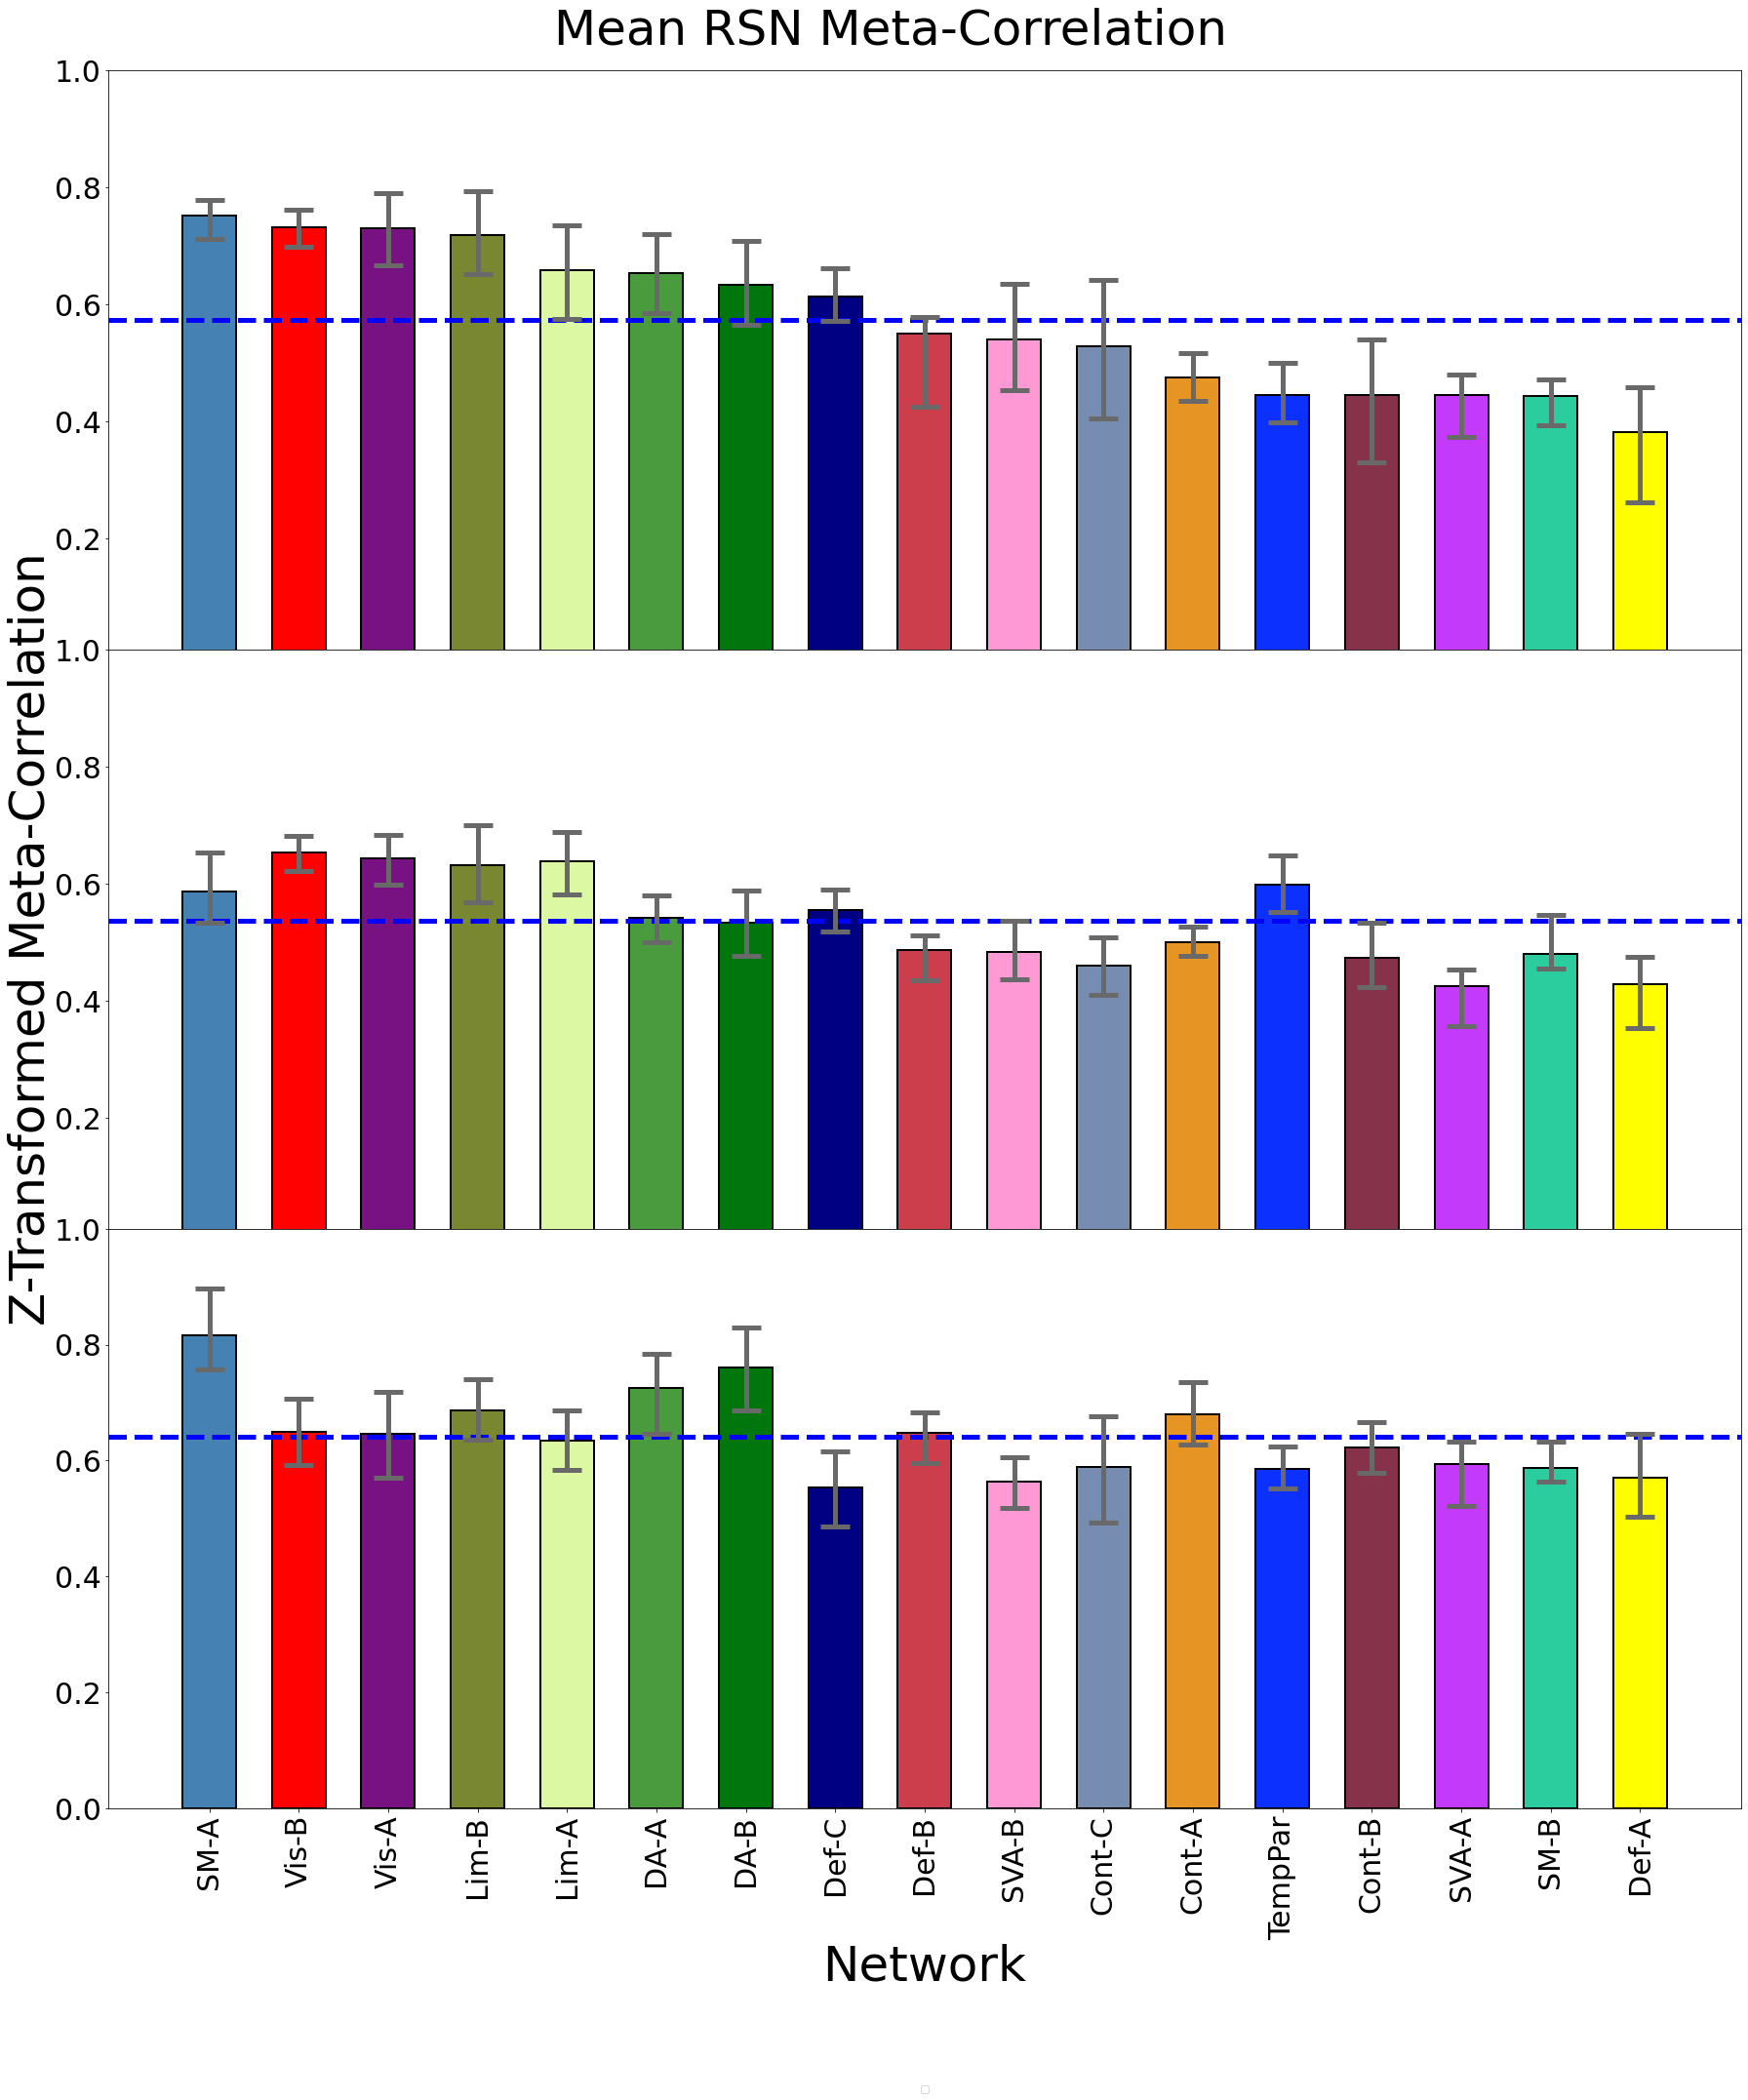

In [28]:
plt.figure(figsize=(30,30))
ax1 = plt.subplot(3, 1, 1)
plt.bar(labels, new_plot_list[0][1], yerr=ci_list_all[0], capsize=15, error_kw=dict(ecolor='dimgrey',lw=5,capthick=5), align='center', zorder=2, color=colors, edgecolor='black', linewidth=2, width=0.6)
plt.xticks(rotation=90)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.ylim(0.01, 1.0)
plt.axhline(y=np.mean(new_plot_list[0][1]), color='b', linestyle='--', linewidth=5)

ax2 = plt.subplot(3, 1, 2, sharex = ax1)
plt.bar(labels, new_plot_list[1][1], yerr=ci_list_all[1], capsize=15, error_kw=dict(ecolor='dimgrey',lw=5,capthick=5), align='center', zorder=2, color=colors, edgecolor='black', linewidth=2, width=0.6)
plt.xticks(rotation=90)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.ylim(0.01, 1.0)
plt.axhline(y=np.mean(new_plot_list[1][1]), color='b', linestyle='--', linewidth=5)

ax3 = plt.subplot(3, 1, 3, sharex = ax1)
plt.bar(labels, new_plot_list[2][1], yerr=ci_list_all[2], capsize=15, error_kw=dict(ecolor='dimgrey',lw=5,capthick=5), align='center', zorder=2, color=colors, edgecolor='black', linewidth=2, width=0.6)
plt.xticks(rotation=90)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.ylim(0, 1.0)
plt.axhline(y=np.mean(new_plot_list[2][1]), color='b', linestyle='--', linewidth=5)
plt.xlabel('Network', size = 50)

plt.subplots_adjust(top = 0.95, hspace=0.0)
ax3.legend(bbox_to_anchor=(.5, -.5), loc='lower center', ncol=4, markerscale=1.4)
plt.suptitle('Mean RSN Meta-Correlation ', size = 50)
plt.text(-2.0,1.5, "Z-Transformed Meta-Correlation", ha="center", va="center", rotation=90, size = 50)
plt.savefig('/Users/neurogazer/Pipeline/Publication_Work/PAFA/Figures/fig8/Network_MC_Schaefer17Networks.pdf', bbox_inches='tight')
plt.show()

In [29]:
print(new_plot_list[0][1])
max(new_plot_list[0][1]), min(new_plot_list[0][1])

[0.7512458016354939, 0.7311760154750301, 0.729884862372409, 0.7172141945873415, 0.6587266200167398, 0.6534859459839454, 0.6333265152227477, 0.6129651650138246, 0.5499335680208886, 0.5400870073977095, 0.5281285966593335, 0.47512372742355746, 0.44531724171634524, 0.44490511158807916, 0.44489721482708755, 0.4434745321416792, 0.38122339304913194]


(0.7512458016354939, 0.38122339304913194)

In [30]:
print(new_plot_list[1][1])
max(new_plot_list[1][1]), min(new_plot_list[1][1])

[0.5859556875872313, 0.6535072132944219, 0.6427104473560965, 0.6320915464885996, 0.6376293841916839, 0.541474353367807, 0.5326077882794166, 0.5546044727431049, 0.4866085822827573, 0.4833052671158512, 0.45933334408412824, 0.49899687652254465, 0.5973466688622262, 0.47278867999283053, 0.42463823567705494, 0.47902345158225584, 0.4280498903948257]


(0.6535072132944219, 0.42463823567705494)

In [31]:
print(new_plot_list[2][1])
max(new_plot_list[2][1]), min(new_plot_list[2][1])

[0.8160322442400895, 0.6488048391223216, 0.6458154760000141, 0.6860711267825599, 0.6351711528068616, 0.7258099016585173, 0.7608004175217649, 0.5542393282395545, 0.6471063747282766, 0.5630454379803231, 0.58807884654395, 0.6802523468257811, 0.5858254384761812, 0.6219922140752938, 0.5947471287063969, 0.5872591931146991, 0.5705002037881209]


(0.8160322442400895, 0.5542393282395545)

In [32]:
np.mean(new_plot_list[0][1]), np.std(new_plot_list[0][1])

(0.573006794890079, 0.1181102456300896)

In [33]:
np.mean(new_plot_list[1][1]), np.std(new_plot_list[1][1])

(0.5359218758719316, 0.07481883438690837)

In [34]:
np.mean(new_plot_list[2][1]), np.std(new_plot_list[2][1])

(0.6418559806241592, 0.0710030401480904)

# Figure 9

In [35]:
mfmc_orig_path = '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_MF_n441_schaefer400.dscalar.nii'
mfmc_ar_path = '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_MF_age-regressed_n441_schaefer400.dscalar.nii'
mfmc_orig_data = np.array(nib.load(mfmc_orig_path).get_fdata())
mfmc_ar_data = np.array(nib.load(mfmc_ar_path).get_fdata())
print(mfmc_orig_data.shape)
print(mfmc_ar_data.shape)

tfmc_orig_path = '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_TF_n441_schaefer400.dscalar.nii'
tfmc_ar_path = '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_TF_age-regressed_n441_schaefer400.dscalar.nii'
tfmc_orig_data = np.array(nib.load(tfmc_orig_path).get_fdata())
tfmc_ar_data = np.array(nib.load(tfmc_ar_path).get_fdata())
print(tfmc_orig_data.shape)
print(tfmc_ar_data.shape)

mtmc_orig_path = '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_MT_n441_schaefer400.dscalar.nii'
mtmc_ar_path = '/Users/neurogazer/Pipeline/Publication_Work/PAFA/analysis_PAFA_HBM revision_N441/metacorr_maps/metacorr_MT_age-regressed_n441_schaefer400.dscalar.nii'
mtmc_orig_data = np.array(nib.load(mtmc_orig_path).get_fdata())
mtmc_ar_data = np.array(nib.load(mtmc_ar_path).get_fdata())
print(mtmc_orig_data.shape)
print(mtmc_ar_data.shape)

(1, 64984)
(1, 64984)
(1, 64984)
(1, 64984)
(1, 64984)
(1, 64984)


In [38]:
corr_lists = []
for corr_data in [mfmc_orig_data, mfmc_ar_data, tfmc_orig_data, tfmc_ar_data, mtmc_orig_data, mtmc_ar_data]:
    voxel_corr_roi_list = []
    for i, entry in enumerate(voxel_index[0]):
        corr_val = corr_data[0][i]
        roi = template_labels[0][entry][0]
    #     print(i, roi, corr_val)
        voxel_corr_roi_list.append([roi, corr_val])

    corr_map = []
    for region in roi_list:
        mean_count = 0
        mean_sum = 0
        for entry in voxel_corr_roi_list:
            roi = entry[0]
            corr_val = entry[1]
            if region == roi:
                mean_count = mean_count + 1
                mean_sum = mean_sum + corr_val
        if region == '???':
            mean_val = 0
        else:
            mean_val = mean_sum / mean_count
#         print(region, mean_val)
        corr_map.append([region, mean_val])

    print(len(corr_map))
    corr_lists.append(corr_map)
print(len(corr_lists))

401
401
401
401
401
401
6


In [39]:
labels = [entry[0] for entry in corr_lists[0][1:]]
mfmc_orig = [entry[1] for entry in corr_lists[0][1:]]
mfmc_age_reg = [entry[1] for entry in corr_lists[1][1:]]
tfmc_orig = [entry[1] for entry in corr_lists[2][1:]]
tfmc_age_reg = [entry[1] for entry in corr_lists[3][1:]]
mtmc_orig = [entry[1] for entry in corr_lists[4][1:]]
mtmc_age_reg = [entry[1] for entry in corr_lists[5][1:]]

print(len(labels), len(mfmc_orig), len(mfmc_age_reg), len(tfmc_orig), len(tfmc_age_reg), len(mtmc_orig), len(mtmc_age_reg))
print(labels)

400 400 400 400 400 400 400
['17Networks_LH_VisCent_ExStr_1', '17Networks_LH_VisCent_ExStr_2', '17Networks_LH_VisCent_ExStr_3', '17Networks_LH_VisCent_ExStr_4', '17Networks_LH_VisCent_ExStr_5', '17Networks_LH_VisCent_ExStr_6', '17Networks_LH_VisCent_Striate_1', '17Networks_LH_VisCent_ExStr_7', '17Networks_LH_VisCent_ExStr_8', '17Networks_LH_VisCent_ExStr_9', '17Networks_LH_VisCent_ExStr_10', '17Networks_LH_VisCent_ExStr_11', '17Networks_LH_VisPeri_ExStrInf_1', '17Networks_LH_VisPeri_ExStrInf_2', '17Networks_LH_VisPeri_ExStrInf_3', '17Networks_LH_VisPeri_ExStrInf_4', '17Networks_LH_VisPeri_ExStrInf_5', '17Networks_LH_VisPeri_StriCal_1', '17Networks_LH_VisPeri_StriCal_2', '17Networks_LH_VisPeri_ExStrSup_1', '17Networks_LH_VisPeri_ExStrSup_2', '17Networks_LH_VisPeri_ExStrSup_3', '17Networks_LH_VisPeri_ExStrSup_4', '17Networks_LH_VisPeri_ExStrSup_5', '17Networks_LH_SomMotA_1', '17Networks_LH_SomMotA_2', '17Networks_LH_SomMotA_3', '17Networks_LH_SomMotA_4', '17Networks_LH_SomMotA_5', '17Net

In [40]:
mfmc_corr_val = np.corrcoef(mfmc_orig, mfmc_age_reg)[0][1]
tfmc_corr_val = np.corrcoef(tfmc_orig, tfmc_age_reg)[0][1]
mtmc_corr_val = np.corrcoef(mtmc_orig, mtmc_age_reg)[0][1]

In [41]:
colors = []
plot_labels = []
for corr_label in labels:
    if corr_label.find('VisCent') > 0:
        color = (0.470588, 0.0705882, 0.513726)
        label = 'Vis-A'
    if corr_label.find('VisPeri') > 0:
        color = (1.0, 0.00392157, 0.00392157)
        label = 'Vis-B'
    if corr_label.find('SomMotA') > 0:
        color = (0.27451, 0.505882, 0.705882)
        label = 'SM-A'
    if corr_label.find('SomMotB') > 0:
        color = (0.168627, 0.8, 0.619608)
        label = 'SM-B'
    if corr_label.find('DorsAttnA') > 0:
        color = (0.290196, 0.607843, 0.239216)
        label = 'DA-A'
    if corr_label.find('DorsAttnB') > 0:
        color = (0.0, 0.462745, 0.0470588)
        label = 'DA-B'
    if corr_label.find('SalVentAttnA') > 0:
        color = (0.768627, 0.227451, 0.984314)
        label = 'SVA-A'
    if corr_label.find('SalVentAttnB') > 0:
        color = (1.0, 0.6, 0.839216)
        label = 'SVA-B'
    if corr_label.find('LimbicA') > 0:
        color = (0.862745, 0.972549, 0.635294)
        label = 'Lim-A'
    if corr_label.find('LimbicB') > 0:
        color = (0.478431, 0.529412, 0.192157)
        label = 'Lim-B'
    if corr_label.find('ContA') > 0:
        color = (0.901961, 0.580392, 0.137255)
        label = 'Cont-A'
    if corr_label.find('ContB') > 0:
        color = (0.529412, 0.196078, 0.294118)
        label = 'Cont-B'
    if corr_label.find('ContC') > 0:
        color = (0.466667, 0.54902, 0.694118)
        label = 'Cont-C'
    if corr_label.find('DefaultA') > 0:
        color = (1.0, 0.996078, 0.00392157)
        label = 'Def-A'
    if corr_label.find('DefaultB') > 0:
        color = (0.803922, 0.243137, 0.301961)
        label = 'Def-B'
    if corr_label.find('DefaultC') > 0:
        color = (0.0, 0.0, 0.513726)
        label = 'Def-C'
    if corr_label.find('TempPar') > 0:
        color = (0.0470588, 0.188235, 0.996078)
        label = 'TempPar'
    colors.append(color)
    plot_labels.append(label)

colors = list(np.array(colors))

In [42]:
len(colors), len(plot_labels)

(400, 400)

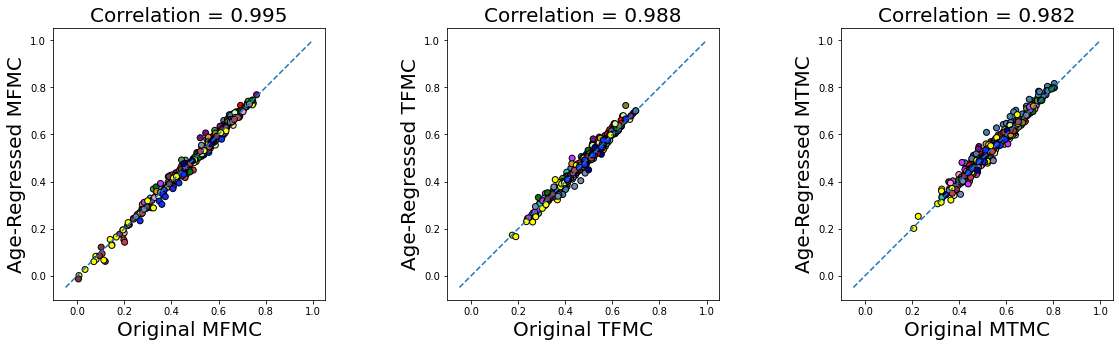

In [43]:
plt.figure(figsize=(20,5))

plt.subplot(131).set_aspect('equal', adjustable='box')
plt.scatter(mfmc_orig, mfmc_age_reg, color=colors, edgecolors='black')
# plt.xticks(size = 20)
plt.xlabel('Original MFMC', size = 20)
plt.ylabel('Age-Regressed MFMC', size = 20)
title = 'Correlation = ' + str(round(mfmc_corr_val, 3))
plt.title(title, size = 20)
plt.plot([-.05,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], [-.05,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], '--')

# plt.figure(figsize=(20,5))
plt.subplot(132).set_aspect('equal', adjustable='box')
plt.scatter(tfmc_orig, tfmc_age_reg, color=colors, edgecolors='black')
# plt.xticks(size = 20)
plt.xlabel('Original TFMC', size = 20)
plt.ylabel('Age-Regressed TFMC', size = 20)
title = 'Correlation = ' + str(round(tfmc_corr_val, 3))
plt.title(title, size = 20)
plt.plot([-.05,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], [-.05,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], '--')

# plt.figure(figsize=(20,5))
plt.subplot(133).set_aspect('equal', adjustable='box')
plt.scatter(mtmc_orig, mtmc_age_reg, color=colors, edgecolors='black')
# plt.xticks(size = 20)
plt.xlabel('Original MTMC', size = 20)
plt.ylabel('Age-Regressed MTMC', size = 20)
title = 'Correlation = ' + str(round(mtmc_corr_val, 3))
plt.title(title, size = 20)
plt.plot([-.05,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], [-.05,0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1.0], '--')

plt.savefig('/Users/neurogazer/Pipeline/Publication_Work/PAFA/Figures/fig9/Orig_Age-Regressed_MetaCorr_Compare.pdf', bbox_inches='tight')
plt.show()

# Figure 10

In [45]:
# ROI-level template, Gordon
template = nib.load('/Users/neurogazer/Pipeline/Publication_Work/PAFA/Gordon333_FreesurferSubcortical.32k_fs_LR.dlabel.nii')
print(template)
print(template.header)
print(template.shape)

template_labels = template.header.get_axis(0).label
len(template_labels[0])

voxel_all_index = template.get_fdata()
print(len(voxel_all_index[0]))
voxel_index = np.array([list(voxel_all_index[0][0:59412])])
print(len(voxel_index[0]))
voxel_index, template_labels[0]

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


(1, 91282)
91282
59412


(array([[ 48., 264., 302., ...,   0.,   0.,   0.]]),
 {0: ('???', (1.0, 1.0, 1.0, 0.0)),
  1: ('L_None_1', (1.0, 1.0, 1.0, 1.0)),
  2: ('L_None_2', (1.0, 1.0, 1.0, 1.0)),
  3: ('L_None_3', (1.0, 1.0, 1.0, 1.0)),
  4: ('L_None_4', (1.0, 1.0, 1.0, 1.0)),
  5: ('L_None_5', (1.0, 1.0, 1.0, 1.0)),
  6: ('L_None_6', (1.0, 1.0, 1.0, 1.0)),
  7: ('L_None_7', (1.0, 1.0, 1.0, 1.0)),
  8: ('L_None_8', (1.0, 1.0, 1.0, 1.0)),
  9: ('L_None_9', (1.0, 1.0, 1.0, 1.0)),
  10: ('L_None_10', (1.0, 1.0, 1.0, 1.0)),
  11: ('L_None_11', (1.0, 1.0, 1.0, 1.0)),
  12: ('L_None_12', (1.0, 1.0, 1.0, 1.0)),
  13: ('L_None_13', (1.0, 1.0, 1.0, 1.0)),
  14: ('L_None_14', (1.0, 1.0, 1.0, 1.0)),
  15: ('L_None_15', (1.0, 1.0, 1.0, 1.0)),
  16: ('L_None_16', (1.0, 1.0, 1.0, 1.0)),
  17: ('L_None_17', (1.0, 1.0, 1.0, 1.0)),
  18: ('L_None_18', (1.0, 1.0, 1.0, 1.0)),
  19: ('L_None_19', (1.0, 1.0, 1.0, 1.0)),
  20: ('L_None_20', (1.0, 1.0, 1.0, 1.0)),
  21: ('L_None_21', (1.0, 1.0, 1.0, 1.0)),
  22: ('R_None_22', (1.0, 

In [46]:
roi_list = []
for i in range(334):
    roi_list.append(template_labels[0][i][0])
roi_list = np.array(roi_list)
print(len(roi_list))
roi_list

334


array(['???', 'L_None_1', 'L_None_2', 'L_None_3', 'L_None_4', 'L_None_5',
       'L_None_6', 'L_None_7', 'L_None_8', 'L_None_9', 'L_None_10',
       'L_None_11', 'L_None_12', 'L_None_13', 'L_None_14', 'L_None_15',
       'L_None_16', 'L_None_17', 'L_None_18', 'L_None_19', 'L_None_20',
       'L_None_21', 'R_None_22', 'R_None_23', 'R_None_24', 'R_None_25',
       'R_None_26', 'R_None_27', 'R_None_28', 'R_None_29', 'R_None_30',
       'R_None_31', 'R_None_32', 'R_None_33', 'R_None_34', 'R_None_35',
       'R_None_36', 'R_None_37', 'R_None_38', 'R_None_39', 'R_None_40',
       'R_None_41', 'R_None_42', 'R_None_43', 'R_None_44', 'R_None_45',
       'R_None_46', 'R_None_47', 'L_Default_1', 'L_Default_2',
       'L_Default_3', 'L_Default_4', 'L_Default_5', 'L_Default_6',
       'L_Default_7', 'L_Default_8', 'L_Default_9', 'L_Default_10',
       'L_Default_11', 'L_Default_12', 'L_Default_13', 'L_Default_14',
       'L_Default_15', 'L_Default_16', 'L_Default_17', 'L_Default_18',
       'L_Defa

In [47]:
networks_names = ['None', 'Default', 'ParietoOccip', 'FrontoParietal', 'Salience', 'CinguloOperc', 'MedialParietal', 
                  'DorsalAttn', 'VentralAttn', 'Visual', 'SMhand', 'SMmouth', 'Auditory']
plot_networks_names = ['Default', 'ParietoOccip', 'FrontoParietal', 'Salience', 'CinguloOperc', 'ParietalMem', 
                  'DorsalAttn', 'VentralAttn', 'Visual', 'SomoMoto', 'LatSomoMoto', 'Auditory']

In [50]:
# Un-weighted Average 
def Make_Network_Plots(file_list):
    output_list, error_df_list = [], []
    for entry in file_list:
        corr_data = np.arctanh(np.array(nib.load(entry).get_fdata())) #Meta-correlation values
#         corr_data = np.array(nib.load(entry).get_fdata())             #Mean Values
        print(corr_data.shape)
        
        voxel_corr_roi_list = []
        for i, entry in enumerate(voxel_index[0]):
            corr_val = corr_data[0][i]
            roi = template_labels[0][entry][0]
        #     print(i, roi, corr_val)
            voxel_corr_roi_list.append([roi, corr_val])
            
        corr_map = []
        for region in roi_list:
            mean_count = 0
            mean_sum = 0
            for entry in voxel_corr_roi_list:
                roi = entry[0]
                corr_val = entry[1]
                if region == roi:
                    mean_count = mean_count + 1
                    mean_sum = mean_sum + corr_val
            if region == '???':
                mean_val = 0
            else:
                mean_val = mean_sum / mean_count
        #     print(region, mean_val)
            corr_map.append([region, mean_val])
        print(len(corr_map))
        
        voxel_data = []
        for entry in voxel_index[0]:
            roi = template_labels[0][entry][0]
#             print(entry, roi)
            for entry in corr_map:
                if entry[0] == roi:
                    voxel_data.append(entry[1])
                    
        none_list, default_list, po_list, fp_list, salience_list, co_list, mp_list = [], [], [], [], [], [], []
        da_list, va_list, visual_list, smhand_list, smmouth_list, aud_list = [], [], [], [], [], []
        for i in range(np.shape(corr_map)[0]):
            corr_val = corr_map[i][1]
            corr_label = roi_list[i]
#             print(corr_label, corr_val)

            if corr_label.find('None') > 0:
                none_list.append(corr_val)
            if corr_label.find('Default') > 0:
                default_list.append(corr_val)
            if corr_label.find('ParietoOccip') > 0:
                po_list.append(corr_val)
            if corr_label.find('FrontoParietal') > 0:
                fp_list.append(corr_val)
            if corr_label.find('Salience') > 0:
                salience_list.append(corr_val)
            if corr_label.find('CinguloOperc') > 0:
                co_list.append(corr_val)
            if corr_label.find('MedialParietal') > 0:
                mp_list.append(corr_val)
            if corr_label.find('DorsalAttn') > 0:
                da_list.append(corr_val)
            if corr_label.find('VentralAttn') > 0:
                va_list.append(corr_val)
            if corr_label.find('Visual') > 0:
                visual_list.append(corr_val)
            if corr_label.find('SMhand') > 0:
                smhand_list.append(corr_val)
            if corr_label.find('SMmouth') > 0:
                smmouth_list.append(corr_val)
            if corr_label.find('Auditory') > 0:
                aud_list.append(corr_val)
        print(len(none_list),len(default_list),len(po_list),len(fp_list),len(salience_list),len(co_list),len(mp_list),
              len(da_list),len(va_list),len(visual_list),len(smhand_list),len(smmouth_list),len(aud_list))
                
        mean_corr_list = []
        error_df = pd.DataFrame()
        for ii, network_list in enumerate([default_list, po_list, fp_list, salience_list, co_list, mp_list, da_list, va_list, 
                             visual_list, smhand_list, smmouth_list, aud_list]):
            mean_corr = np.mean(network_list)
            mean_corr_list.append(mean_corr)
            error_df[plot_networks_names[ii]] = pd.Series(network_list)
            error_df[plot_networks_names[ii]+'_weights'] = pd.Series()
        print(len(mean_corr_list))
        
        mean_corr_list_sort, plot_networks_names_sort, networks_names_sort = (list(t) for t in zip(*sorted(
                                zip(mean_corr_list, plot_networks_names, networks_names), reverse=True)))
            
        output_list.append([plot_networks_names_sort, mean_corr_list_sort])
        error_df_list.append(error_df)
        
    return output_list, error_df_list

In [9]:
# file_list = ['/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Mean_Myelin.32k_fs_LR.dscalar.nii', 
#               '/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Mean_Thickness.32k_fs_LR.dscalar.nii']
file_list = ['/Users/neurogazer/Pipeline/test/Regional_Inhomogeneity_Analysis/Ma_Paper_Replication/Final_Figure_Files/Standard_Brain_Maps/MFMC_Gordon.32k_fs_LR.dscalar.nii']

plot_list, error_dfs = Make_Network_Plots(file_list)
print('\n ' + str(len(error_dfs)))
plot_list

(1, 59412)
334
47 41 8 24 4 40 5 32 23 39 38 8 24
12

 1


[[['Salience',
   'SomoMoto',
   'Visual',
   'LatSomoMoto',
   'ParietoOccip',
   'DorsalAttn',
   'FrontoParietal',
   'VentralAttn',
   'CinguloOperc',
   'Auditory',
   'Default',
   'ParietalMem'],
  [0.8375395931127099,
   0.7892521955944712,
   0.7313763759028862,
   0.618046639103893,
   0.601800018530716,
   0.565553066031149,
   0.5474066096269353,
   0.5311564257331155,
   0.452266616048171,
   0.45219100210469804,
   0.45160521240468254,
   0.39736298941901704]]]